In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

import seaborn as sns
import random as rn
import copy as copy

import time

c:\Users\Lavigi\programmi\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('imbd_cleaned.csv')

# Mappa di raggruppamento
category_mapping = {
    'movie': 'Film',
    'tvMovie': 'Film',
    'short': 'Shorts',
    'tvShort': 'Shorts',
    'tvSeries': 'Serie TV',
    'tvMiniSeries': 'Serie TV',
    'tvEpisode': 'Serie TV',
    'tvSpecial': 'Speciale TV',
    'video': 'Video',
    'videoGame': 'Videogame'
}

# Applicare la mappa al dataframe
df['titleType'] = df['titleType'].map(category_mapping)

X = df.select_dtypes(include=['number'])

X = X.values
y = np.array(df['titleType'])

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

## Data Partitioning

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=100, stratify=y)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
clf = HistGradientBoostingClassifier(learning_rate=1.0, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.36725127837086213
F1-score [0.         0.         0.00516796 0.00383509 0.02125399 0.27648202
 0.32591205 0.52907553 0.09114359 0.03255485]


c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       141
      (2, 3]       0.03      0.00      0.01       353
      (3, 4]       0.12      0.00      0.00      1027
      (4, 5]       0.29      0.01      0.02      2719
      (5, 6]       0.29      0.27      0.28      6372
      (6, 7]       0.32      0.33      0.33     11643
      (7, 8]       0.42      0.72      0.53     14463
      (8, 9]       0.24      0.06      0.09      6563
     (9, 10]       0.17      0.02      0.03      1281

    accuracy                           0.37     44588
   macro avg       0.19      0.14      0.13     44588
weighted avg       0.32      0.37      0.31     44588



c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# XGBoost
https://xgboost.readthedocs.io/en/stable/python/python_intro.html

In [7]:
# !pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from xgboost import XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Definisci il modello
clf = XGBClassifier(objective='binary:logistic', tree_method='exact', use_label_encoder=True, random_state=42)

# Definisci la griglia di parametri
param_dist = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0, 1, 10],
    'reg_alpha': [0, 0.1, 1]
}

# Specifica il numero di iterazioni
n_iter = 30 # Puoi modificare questo valore in base alle tue esigenze

random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, scoring='accuracy',
                                   cv=3, verbose=2, n_jobs=-1, n_iter=n_iter, error_score='raise'
                                   )

# Esegui la random search
random_search.fit(X_train, y_train)

# Stampa i migliori parametri
print("Migliori parametri trovati:", random_search.best_params_)
print("Miglior punteggio:", random_search.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [ ]:
# Definisci il modello con i migliori iperparametri trovati
best_model = XGBClassifier(
    objective='binary:logistic',
    tree_method='exact',
    random_state=42,
    subsample=0.8,
    reg_lambda=0,
    reg_alpha=0,
    n_estimators=300,
    max_depth=9,
    learning_rate=0.3,
    gamma=0.2,
    colsample_bytree=1, probability=True
)

# Addestra il modello con i dati di addestramento
best_model.fit(X_train, y_train)

# evals_result = best_model.evals_result()
# epochs = len(evals_result['validation_0']['logloss'])
# print("Numero medio di epoch del miglior modello:", epochs)

c:\Users\Lavigi\programmi\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:04:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "probability" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [58]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Predizioni del modello
y_pred = best_model.predict(X_test)

# Dizionario di mapping delle classi
class_mapping = {0: 'Film', 1: 'Serie TV', 2: 'Shorts', 3: 'Speciale TV', 4: 'Video', 5: 'Videogame'}

# Lista dei nomi delle classi
target_names = [class_mapping[i] for i in np.unique(y_test)]

# Stampa i risultati con i nomi delle classi originali
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy 0.9374271104333004
F1-score [0.92934928 0.97422564 0.90918036 0.33193277 0.57829395 0.8258317 ]
              precision    recall  f1-score   support

        Film       0.91      0.95      0.93     12835
    Serie TV       0.97      0.98      0.97     24351
      Shorts       0.89      0.93      0.91      4992
 Speciale TV       0.59      0.23      0.33       343
       Video       0.76      0.47      0.58      1541
   Videogame       0.85      0.80      0.83       526

    accuracy                           0.94     44588
   macro avg       0.83      0.73      0.76     44588
weighted avg       0.93      0.94      0.93     44588



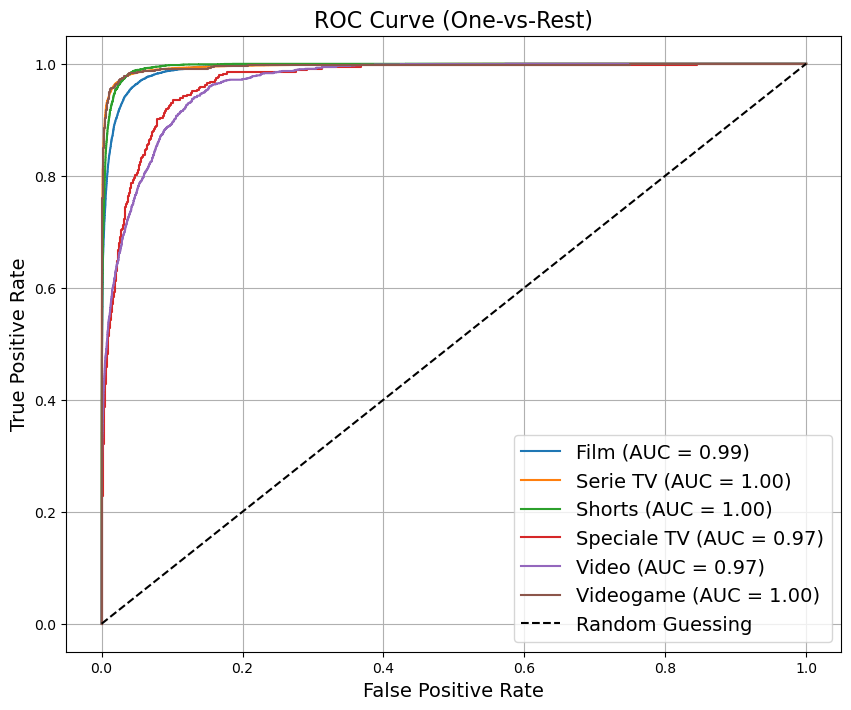

In [ ]:
# Calcola la ROC curve e la Precision-Recall curve
y_pred_proba = best_model.predict_proba(X_test)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Supponiamo che questo sia il tuo dizionario di mapping
class_mapping = {0: 'Film', 1: 'Serie TV', 2: 'Shorts', 3: 'Speciale TV', 4: 'Video', 5: 'Videogame'}

# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_test
y_test_binarized = label_binarize(y_test, classes=classes)

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    
    # Traccia la curva ROC con il nome della classe originale
    plt.plot(fpr, tpr, label=f"{class_mapping[class_label]} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.grid()
plt.show()


In [60]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_pred_proba, multi_class="ovr", average="macro")

0.9855861097939204

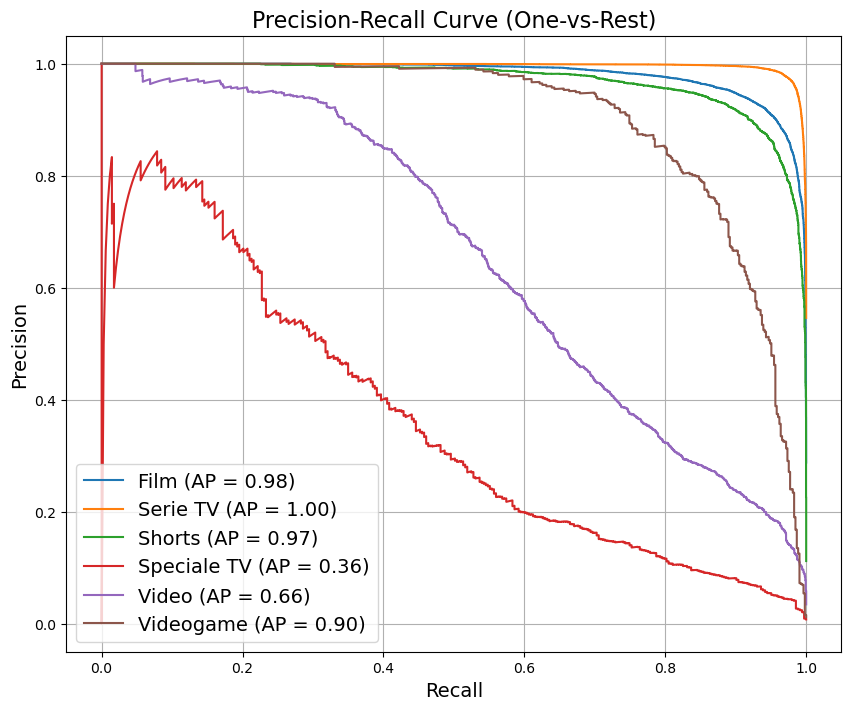

In [62]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])
    
    # Traccia la curva Precision-Recall con il nome della classe originale
    plt.plot(recall, precision, label=f"{class_mapping[class_label]} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.grid()
plt.show()